In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pickle
import json
from scipy.stats import shapiro,kstest,normaltest

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Problem Statement

To predict Charges of Insurance

### 2. Data Gathering

In [5]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 3.EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.select_dtypes(include="object").head(1)

,sex,smoker,region
0,female,yes,southwest


### 4.Feature Engineering

#### 4.1 Sex

In [10]:
df["sex"].value_counts().to_dict()

{'male': 676, 'female': 662}

In [11]:
df['sex'].replace({'male':1, 'female':0},inplace=True)

#### 4.2 smoker

In [12]:
df["smoker"].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [13]:
df["smoker"].replace({'no': 0, 'yes': 1},inplace=True)

#### 4.3 region

In [14]:
df["region"].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [15]:
df = pd.get_dummies(df,columns=["region"])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [16]:
lr_model=LinearRegression()
lr_model.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


<AxesSubplot:>

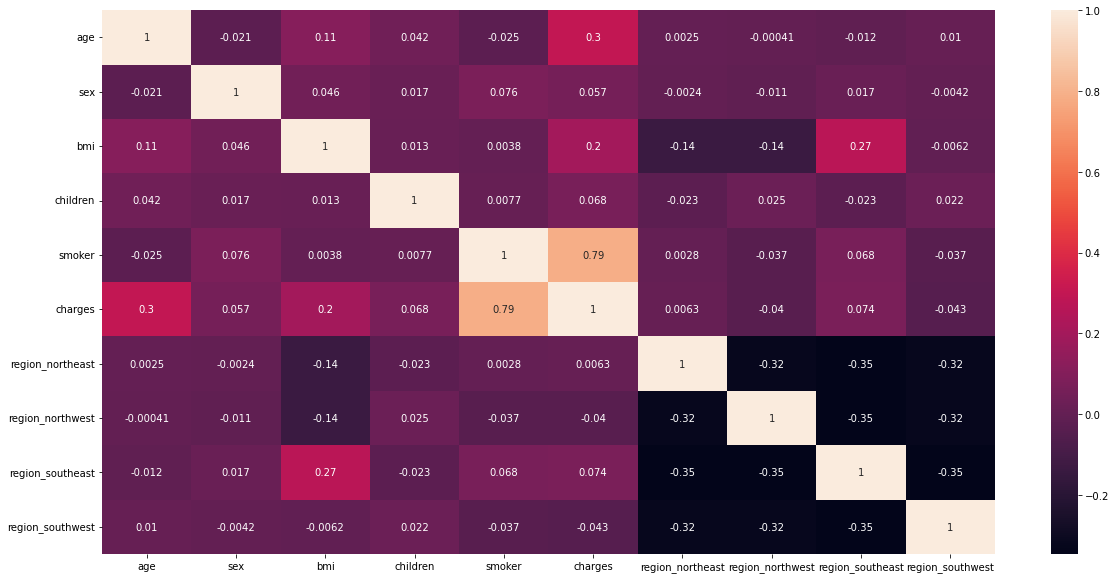

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### 5.Feature Selection

In [27]:
x=df.drop("charges",axis=1)
y=df["charges"]

<AxesSubplot:>

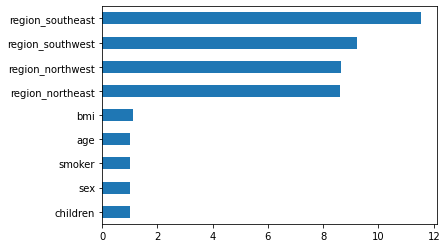

In [28]:
vif_list=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ser=pd.Series(vif_list,index=x.columns)
ser.sort_values().plot(kind="barh")

### 6. Model Training:

In [19]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [31]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred_train=lr_model.predict(x_train)
res=y_train-y_pred_train


<AxesSubplot:xlabel='charges', ylabel='charges'>

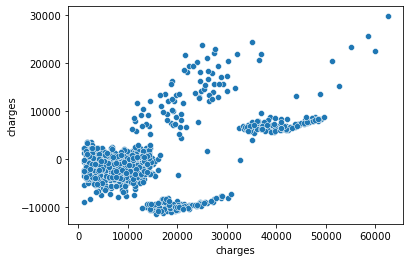

In [40]:
sns.scatterplot(y_train,res)

<AxesSubplot:xlabel='charges', ylabel='Density'>

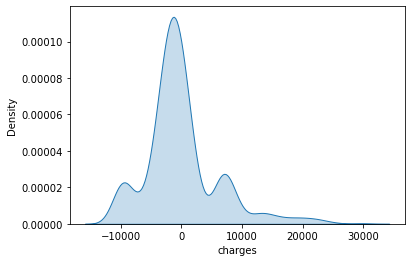

In [44]:
sns.kdeplot(res,fill=True)

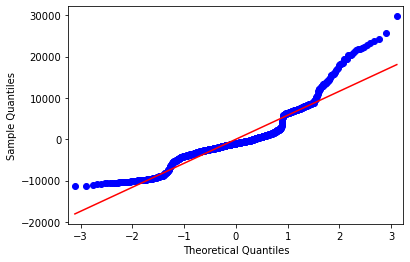

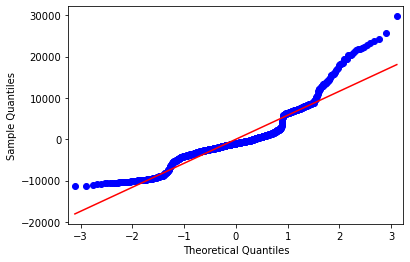

In [38]:
sm.qqplot(res,line="r")

### Model Evaluation

In [47]:
#Train 
y_pred_train=lr_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

mae=mean_absolute_error(y_train,y_pred_train)
print("MSE:",mae)

rmse=np.sqrt(mse)
print("RMSE:",rmse)

r2=r2_score(y_train,y_pred_train)
print("R2:",r2)

N=x_train.shape[0]
P=x_train.shape[1]

adj_r2=1-((1-r2)*(N-1)/(N-P-1))
print("Adj R2:",adj_r2)



MSE: 37277681.70201866
MSE: 4208.234572492217
RMSE: 6105.545160099847
R2: 0.7417255854683333
Adj R2: 0.7395326894958947


In [48]:
#Test
y_pred_test=lr_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
print("MSE:",mse)

mae=mean_absolute_error(y_test,y_pred_test)
print("MSE:",mae)

rmse=np.sqrt(mse)
print("RMSE:",rmse)

r2=r2_score(y_test,y_pred_test)
print("R2:",r2)

adj_r2=1-((1-r2)*(N-1)/(N-P-1))
print("Adj R2:",adj_r2)


MSE: 33596915.85136146
MSE: 4181.19447375364
RMSE: 5796.2846592762735
R2: 0.7835929767120723
Adj R2: 0.7817555585898163


<AxesSubplot:>

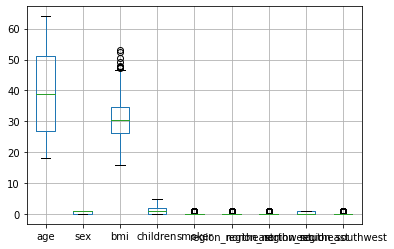

In [49]:
x.boxplot()

<AxesSubplot:xlabel='charges'>

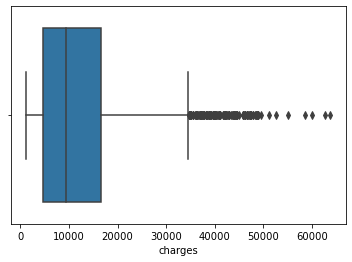

In [52]:
sns.boxplot(df["charges"])

### Write a code for single user

In [74]:
age    = 25
sex    ="male"
bmi    =25
children=0
smoker  ="no"
region  ="northwest"

#charges=?

In [75]:
projected_data={"sex":{"male":1,"female":2},
                "smoker":{"no":0,"yes":1},
                "columns":list(x.columns)
               }

In [76]:
column_names=x.columns
array=np.zeros(x.shape[1])
array[0]=age
array[1]=projected_data["sex"][sex]
array[2]=bmi
array[3]=children
array[4]=projected_data["smoker"][smoker]

region="region_" + region
region_index=np.where(column_names == region)[0][0]
array[region_index] = 1
array


array([25.,  1., 25.,  0.,  0.,  0.,  1.,  0.,  0.])

In [81]:
lr_model.predict([array])

array([2531.2183763])

In [84]:
with open("Linear_model.pkl","wb") as f:
    pickle.dump(lr_model,f)

In [87]:
with open("Project.json","w") as f:
    json.dump(projected_data,f)